In [30]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [120]:
Ns = [1, 16, 256, 4096]
S = 10000
true_theta = 0.7

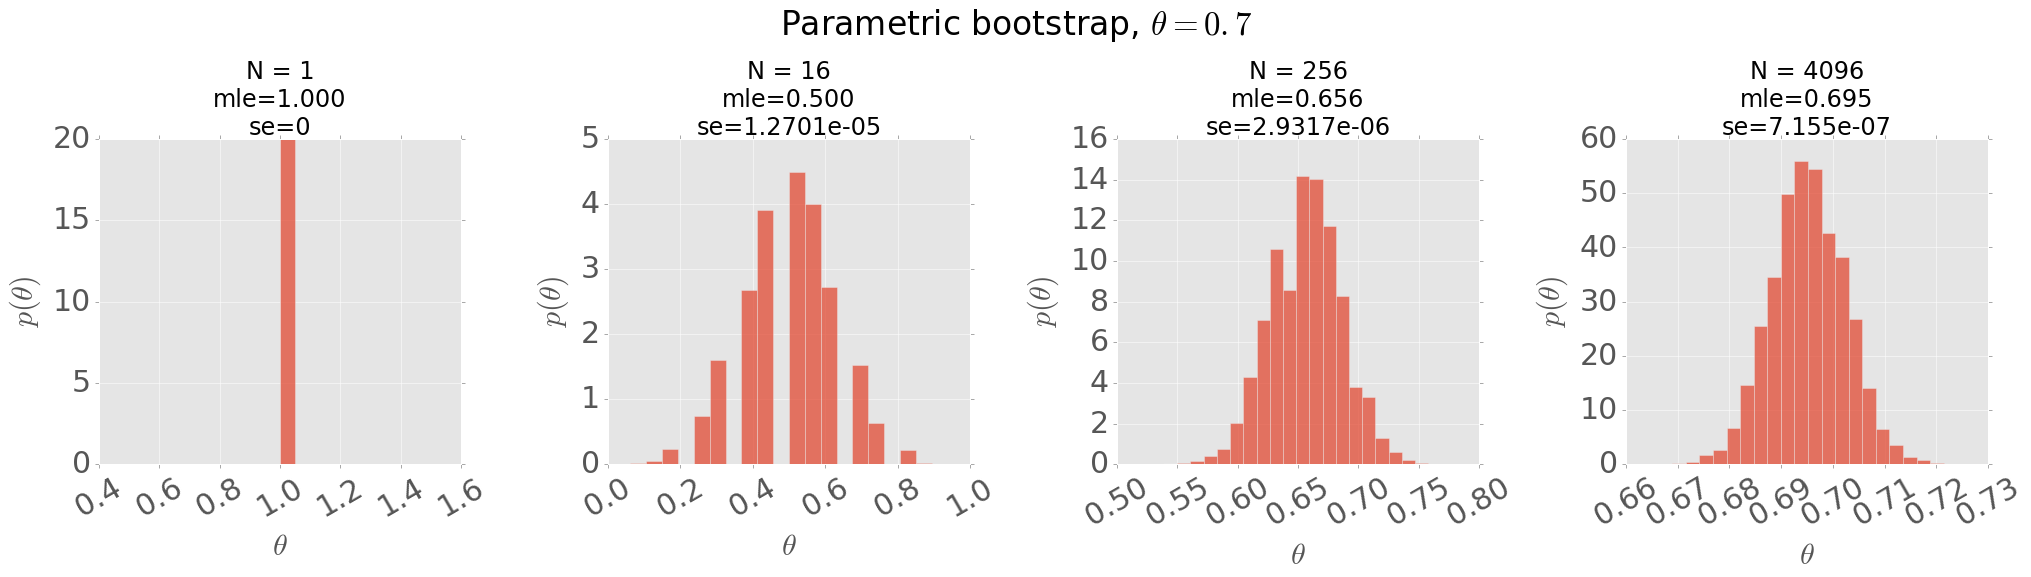

In [126]:
FONTSIZE = 30
plt.close('all')
fig = plt.figure(figsize=(28,8))
gs = matplotlib.gridspec.GridSpec(1, len(Ns))

for i, N in enumerate(Ns):

    data = np.random.rand(N)
    bmle = np.mean((data < true_theta).astype(int))
    vals = [np.mean((np.random.rand(N) < bmle).astype(int)) for s in range(S)]
    se = np.std(vals)/float(len(vals))
    
    ax = plt.subplot(gs[0,i]) 
    n, bins, patches = plt.hist(vals, 20, normed=1, alpha=0.75) 
    ax.set_xlabel(r'$\theta$', fontsize=FONTSIZE, labelpad=10)
    ax.set_ylabel(r'$p(\theta)$', fontsize=FONTSIZE, labelpad=10)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FONTSIZE)
        tick.label.set_rotation(30)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(FONTSIZE)
        tick.label.set_rotation(0)        
    ax.set_title('N = {0:}\nmle={1:.3f}\nse={2:.5g}'.format(N, bmle, se), fontsize=0.8*FONTSIZE)    
plt.tight_layout(pad=0, w_pad=2.0, h_pad=1.0)
fig.suptitle(r"Parametric bootstrap, $\theta={0:}$".format(true_theta), fontsize=FONTSIZE*1.1)
plt.subplots_adjust(top=0.75)

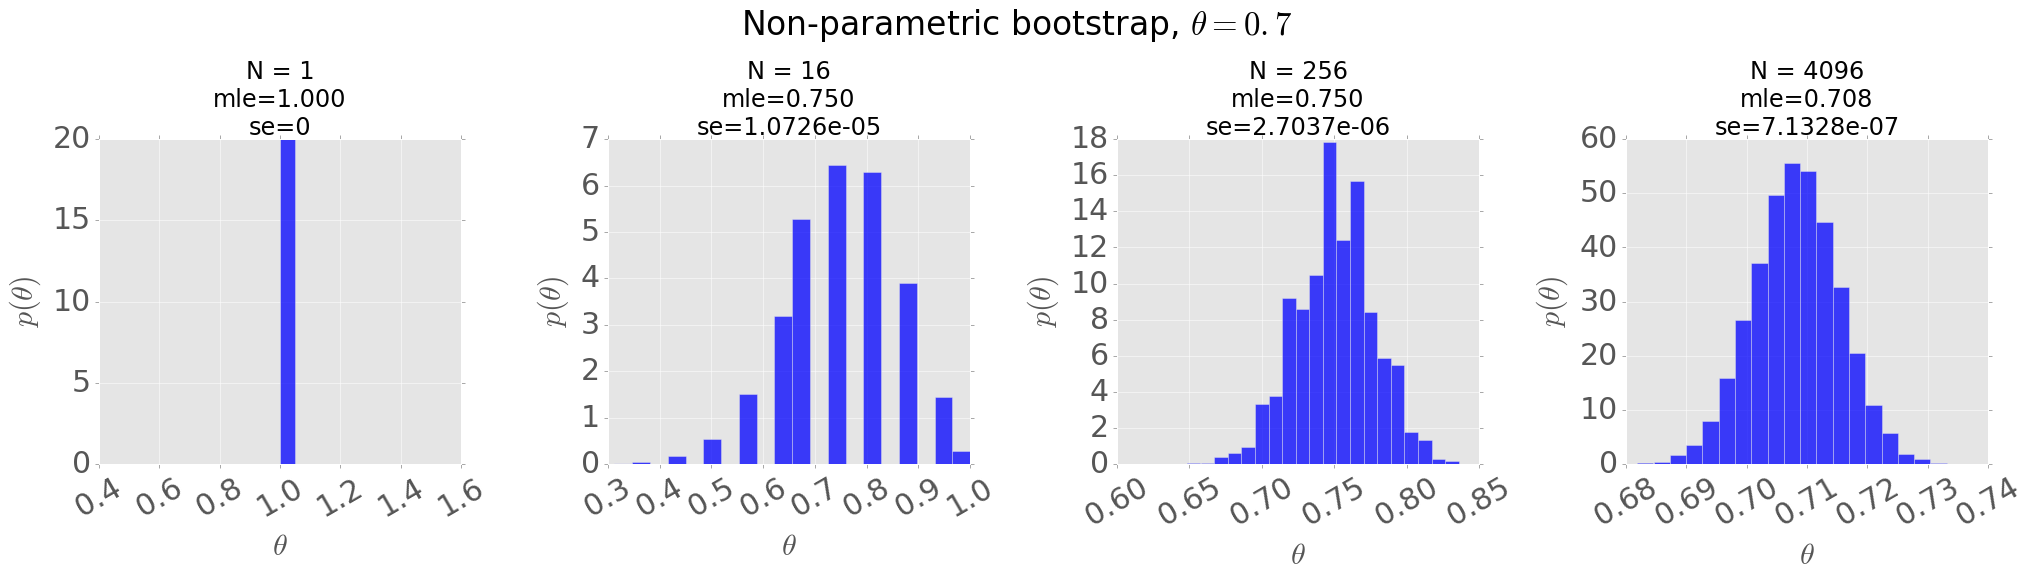

In [127]:
FONTSIZE = 30
plt.close('all')
fig = plt.figure(figsize=(28,8))
gs = matplotlib.gridspec.GridSpec(1, len(Ns))

for i, N in enumerate(Ns):

    data = (np.random.rand(N) < true_theta).astype(int)
    vals = [np.mean(np.random.choice(data, size=len(data), replace=True)) for s in range(S)]
    mle = np.mean(vals)
    se = np.std(vals)/float(len(vals))
    
    ax = plt.subplot(gs[0,i]) 
    n, bins, patches = plt.hist(vals, 20, normed=1, alpha=0.75, color='b')
    ax.set_xlabel(r'$\theta$', fontsize=FONTSIZE, labelpad=10)
    ax.set_ylabel(r'$p(\theta)$', fontsize=FONTSIZE, labelpad=10)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FONTSIZE)
        tick.label.set_rotation(30)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(FONTSIZE)
        tick.label.set_rotation(0)        
    ax.set_title('N = {0:}\nmle={1:.3f}\nse={2:.5g}'.format(N, mle, se), fontsize=0.8*FONTSIZE)    
plt.tight_layout(pad=0, w_pad=2.0, h_pad=1.0)
fig.suptitle(r"Non-parametric bootstrap, $\theta={0:}$".format(true_theta), fontsize=FONTSIZE*1.1)
plt.subplots_adjust(top=0.75)

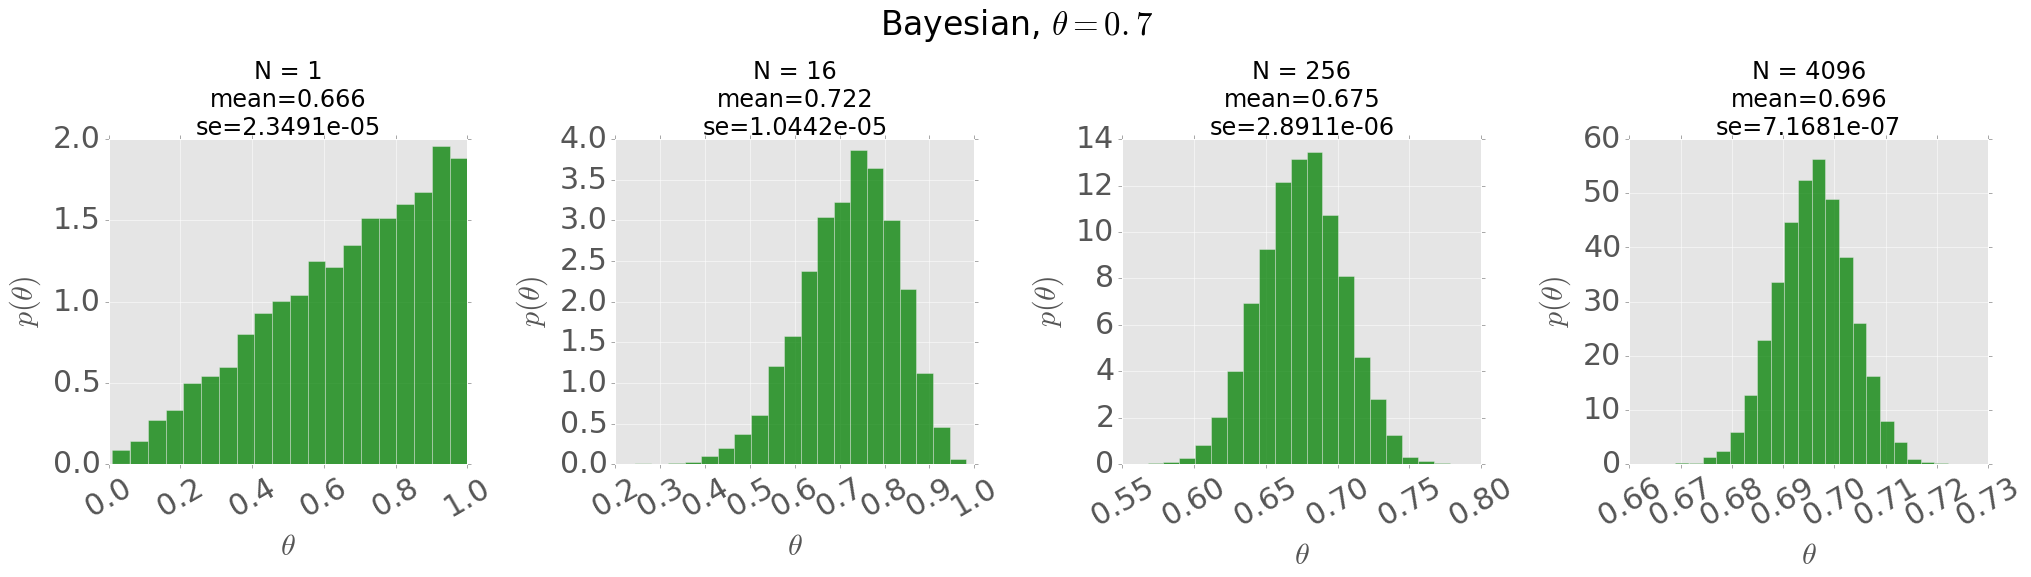

In [141]:
FONTSIZE = 30
plt.close('all')
fig = plt.figure(figsize=(28,8))
gs = matplotlib.gridspec.GridSpec(1, len(Ns))

for i, N in enumerate(Ns):

    data = (np.random.rand(N) < true_theta).astype(int)    
    N1 = np.sum(data == 1)
    N0 = np.sum(data == 0)
    posterior = scipy.stats.beta(a=a0+N1, b=b0+N0)
    vals = posterior.rvs(size=S)
    m = np.mean(vals)
    se = np.std(vals)/float(len(vals))
    
    ax = plt.subplot(gs[0,i]) 
    n, bins, patches = plt.hist(vals, 20, normed=1, alpha=0.75, color='g')
    ax.set_xlabel(r'$\theta$', fontsize=FONTSIZE, labelpad=10)
    ax.set_ylabel(r'$p(\theta)$', fontsize=FONTSIZE, labelpad=10)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FONTSIZE)
        tick.label.set_rotation(30)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(FONTSIZE)
        tick.label.set_rotation(0)        
    ax.set_title('N = {0:}\nmean={1:.3f}\nse={2:.5g}'.format(N, m, se), fontsize=0.8*FONTSIZE)    
plt.tight_layout(pad=0, w_pad=2.0, h_pad=1.0)
fig.suptitle(r"Bayesian, $\theta={0:}$".format(true_theta), fontsize=FONTSIZE*1.1)
plt.subplots_adjust(top=0.75)